# Supervised learning Model

## Preparing Data

In [1]:
import pandas as pd

imune_df = pd.read_csv("../raw_data/CIBERSORTx_Job7_Results.txt",sep='\t')
imune_df.head()

,Mixture,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE
0,1,0.040607,0.0,0.209086,0.122856,0.0,0.088533,0.000000,0.111784,0.052571,...,0.136607,0.000000,0.008096,0.0,0.045574,0.0,0.119292,0.024,0.167135,1.012925
1,4,0.049146,0.0,0.121825,0.076978,0.0,0.153331,0.051057,0.068564,0.059623,...,0.142035,0.003342,0.000000,0.0,0.171013,0.0,0.022019,0.030,0.161424,1.018143
2,5,0.003186,0.0,0.162668,0.042196,0.0,0.240454,0.000000,0.000000,0.018316,...,0.066831,0.000000,0.000000,0.0,0.140387,0.0,0.111967,0.048,0.148986,1.029813
3,9,0.067346,0.0,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,0.019745,0.071104,0.000000,0.0,0.188876,0.0,0.074924,0.004,0.250437,0.986058
4,10,0.000000,0.0,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.065631,0.000000,0.009239,0.0,0.134230,0.0,0.070198,0.024,0.169331,1.020998


In [2]:
#! pip install pyreadstat
import pyreadstat

clinical_df, meta = pyreadstat.read_sav("../raw_data/FIRE3_Heike_set_new.sav")
imune_df.head()

,Mixture,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE
0,1,0.040607,0.0,0.209086,0.122856,0.0,0.088533,0.000000,0.111784,0.052571,...,0.136607,0.000000,0.008096,0.0,0.045574,0.0,0.119292,0.024,0.167135,1.012925
1,4,0.049146,0.0,0.121825,0.076978,0.0,0.153331,0.051057,0.068564,0.059623,...,0.142035,0.003342,0.000000,0.0,0.171013,0.0,0.022019,0.030,0.161424,1.018143
2,5,0.003186,0.0,0.162668,0.042196,0.0,0.240454,0.000000,0.000000,0.018316,...,0.066831,0.000000,0.000000,0.0,0.140387,0.0,0.111967,0.048,0.148986,1.029813
3,9,0.067346,0.0,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,0.019745,0.071104,0.000000,0.0,0.188876,0.0,0.074924,0.004,0.250437,0.986058
4,10,0.000000,0.0,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.065631,0.000000,0.009239,0.0,0.134230,0.0,0.070198,0.024,0.169331,1.020998


In [3]:
imune_df.shape

(451, 26)

In [4]:
clinical_df.head()

,study,pat_nr,CET1_REST0,arm,sex,age,ecog,skin_rash,MOL_SG,RNA_Probe,...,orr1,dpr1,ets_cat,SYNCH_META,PRIMARY_RES,RADIOVORHER,LK,AP,CTX_ADJ,filter_$
0,FIRE 3,1.0,0.0,2.0,2.0,60.0,0.0,0.0,3.0,1.0,...,1.0,NaN,NaN,2.0,1.0,1.0,2.0,1.0,1.0,1.0
1,FIRE 3,2.0,1.0,1.0,2.0,52.0,1.0,0.0,NaN,0.0,...,0.0,NaN,NaN,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2,FIRE 3,3.0,1.0,1.0,2.0,52.0,1.0,0.0,NaN,0.0,...,1.0,NaN,NaN,2.0,1.0,1.0,1.0,1.0,1.0,0.0
3,FIRE 3,4.0,0.0,2.0,1.0,58.0,0.0,0.0,3.0,1.0,...,1.0,NaN,0.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0
4,FIRE 3,5.0,0.0,2.0,2.0,54.0,0.0,0.0,1.0,1.0,...,1.0,NaN,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0


In [5]:
imune_df = imune_df.rename({'Mixture': 'pat_nr'}, axis='columns')
imune_df.head()

,pat_nr,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE
0,1,0.040607,0.0,0.209086,0.122856,0.0,0.088533,0.000000,0.111784,0.052571,...,0.136607,0.000000,0.008096,0.0,0.045574,0.0,0.119292,0.024,0.167135,1.012925
1,4,0.049146,0.0,0.121825,0.076978,0.0,0.153331,0.051057,0.068564,0.059623,...,0.142035,0.003342,0.000000,0.0,0.171013,0.0,0.022019,0.030,0.161424,1.018143
2,5,0.003186,0.0,0.162668,0.042196,0.0,0.240454,0.000000,0.000000,0.018316,...,0.066831,0.000000,0.000000,0.0,0.140387,0.0,0.111967,0.048,0.148986,1.029813
3,9,0.067346,0.0,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,0.019745,0.071104,0.000000,0.0,0.188876,0.0,0.074924,0.004,0.250437,0.986058
4,10,0.000000,0.0,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.065631,0.000000,0.009239,0.0,0.134230,0.0,0.070198,0.024,0.169331,1.020998


In [6]:
clinical_df.shape

(735, 37)

In [7]:
clinical_df["pat_nr"]=clinical_df["pat_nr"].astype('int64')
clinical_df.pat_nr.dtype

dtype('int64')

In [8]:
clinical_df.head(30)
clinical2=clinical_df[["pat_nr","skin_rash"]]
clinical2

,pat_nr,skin_rash
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
730,896,0.0
731,897,0.0
732,898,0.0
733,899,0.0


In [9]:
clinical2

,pat_nr,skin_rash
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
730,896,0.0
731,897,0.0
732,898,0.0
733,899,0.0


In [10]:
cdf=imune_df.merge(clinical2, how='inner', on='pat_nr')
cdf.head()

,pat_nr,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE,skin_rash
0,1,0.040607,0.0,0.209086,0.122856,0.0,0.088533,0.000000,0.111784,0.052571,...,0.000000,0.008096,0.0,0.045574,0.0,0.119292,0.024,0.167135,1.012925,0.0
1,4,0.049146,0.0,0.121825,0.076978,0.0,0.153331,0.051057,0.068564,0.059623,...,0.003342,0.000000,0.0,0.171013,0.0,0.022019,0.030,0.161424,1.018143,0.0
2,5,0.003186,0.0,0.162668,0.042196,0.0,0.240454,0.000000,0.000000,0.018316,...,0.000000,0.000000,0.0,0.140387,0.0,0.111967,0.048,0.148986,1.029813,0.0
3,9,0.067346,0.0,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,0.071104,0.000000,0.0,0.188876,0.0,0.074924,0.004,0.250437,0.986058,1.0
4,10,0.000000,0.0,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.000000,0.009239,0.0,0.134230,0.0,0.070198,0.024,0.169331,1.020998,1.0


In [11]:
cdf.shape

(442, 27)

## Initiating Supervised Model

In [12]:
X=cdf.drop(columns=["pat_nr","P-value","Correlation","RMSE","skin_rash"])
y=cdf["skin_rash"]

<AxesSubplot:>

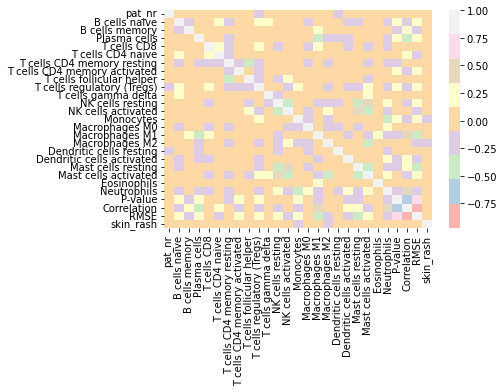

In [13]:
import seaborn as sns

# Heatmap
corr = cdf.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "Pastel1")

### LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

model = LogisticRegression(class_weight='balanced')

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25, 
                                                    random_state = 6) # Holdout

In [15]:
cv_results = cross_validate(model, X_train, y_train, cv=10, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.010245,0.005663,0.558824,0.444444,0.285714,0.347826
1,0.005483,0.004813,0.636364,0.500000,0.333333,0.400000
2,0.004510,0.004776,0.545455,0.625000,0.294118,0.400000
3,0.004411,0.004194,0.545455,0.250000,0.181818,0.210526
4,0.004338,0.004172,0.666667,0.625000,0.384615,0.476190
5,0.004045,0.004292,0.363636,0.375000,0.157895,0.222222
6,0.004066,0.003960,0.575758,0.750000,0.333333,0.461538
7,0.003945,0.003956,0.484848,0.375000,0.200000,0.260870
8,0.004809,0.005245,0.727273,0.875000,0.466667,0.608696
9,0.004256,0.004426,0.545455,0.555556,0.312500,0.400000


/home/henry/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


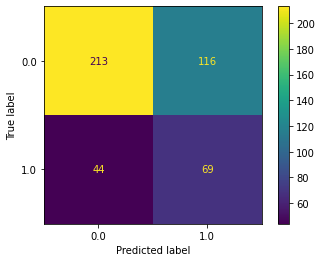

In [16]:
from sklearn.metrics import plot_confusion_matrix
model=model.fit(X,y)
plot_confusion_matrix(model,X,y)

In [17]:
y.value_counts()

0.0    329
1.0    113
Name: skin_rash, dtype: int64

### KNeighborsClassifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)
cv_results = cross_validate(model2, X_train, y_train, cv=10, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)

/home/henry/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/henry/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.001746,0.009149,0.735294,0.000000,0.000000,0.000000
1,0.002256,0.007787,0.757576,0.000000,0.000000,0.000000
2,0.002810,0.006706,0.727273,0.250000,0.400000,0.307692
3,0.001977,0.006174,0.727273,0.125000,0.333333,0.181818
4,0.002187,0.007181,0.666667,0.250000,0.285714,0.266667
5,0.001906,0.007264,0.727273,0.125000,0.333333,0.181818
6,0.002256,0.006076,0.727273,0.250000,0.400000,0.307692
7,0.001711,0.005820,0.757576,0.125000,0.500000,0.200000
8,0.001846,0.005508,0.696970,0.250000,0.333333,0.285714
9,0.001683,0.005380,0.696970,0.111111,0.333333,0.166667


/home/henry/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


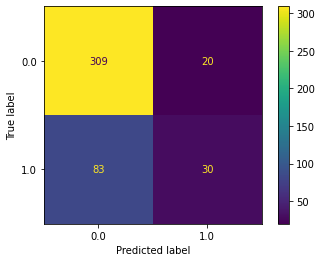

In [19]:
plot_confusion_matrix(model2,X,y)

### SGDClassifier

In [20]:
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate

model3 = SGDClassifier(class_weight='balanced')


model3.fit(X_test,y_test)
cv_results = cross_validate(model3, X_test, y_test, cv=10, scoring=['precision'])

#simplified_model_score = cv_results['test_score'].mean()
cv_results

/home/henry/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/henry/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.00370049, 0.00330782, 0.00276637, 0.00216269, 0.00273299,
        0.0025351 , 0.00224161, 0.00217175, 0.00216985, 0.00291276]),
 'score_time': array([0.00337887, 0.00223684, 0.00211501, 0.00225186, 0.00233698,
        0.00212502, 0.00207567, 0.00219536, 0.00241899, 0.00208426]),
 'test_precision': array([0.33333333, 0.        , 0.27272727, 0.        , 0.25      ,
        0.5       , 0.        , 0.        , 0.33333333, 0.27272727])}

/home/henry/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


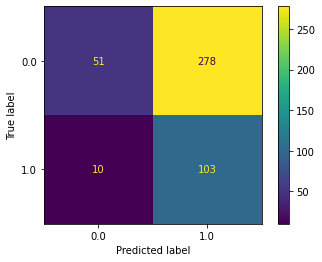

In [21]:
plot_confusion_matrix(model3,X,y)

### Best Model so far

In [22]:
best="KNeighbors"

In [23]:
model4 = KNeighborsClassifier(n_neighbors=20)
model4.fit(X_train,y_train)
cv_results = cross_validate(model4, X_train, y_train, cv=10, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)

/home/henry/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/henry/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/henry/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/henry/.pyenv/ver

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.002001,0.009048,0.735294,0.000,0.0,0.000000
1,0.001994,0.005701,0.727273,0.000,0.0,0.000000
2,0.001658,0.006328,0.727273,0.000,0.0,0.000000
3,0.002228,0.009018,0.757576,0.000,0.0,0.000000
4,0.003342,0.006484,0.787879,0.125,1.0,0.222222
5,0.001754,0.006589,0.757576,0.000,0.0,0.000000
6,0.002158,0.006933,0.757576,0.000,0.0,0.000000
7,0.002274,0.006342,0.757576,0.000,0.0,0.000000
8,0.001711,0.006258,0.757576,0.000,0.0,0.000000
9,0.002544,0.006574,0.727273,0.000,0.0,0.000000


In [24]:
from sklearn.model_selection import GridSearchCV
model5 = KNeighborsClassifier()
k_grid={"n_neighbors":[5,20,21,22,23,24],'p': [1, 2, 3,4,5]}
 
search = GridSearchCV(model5, k_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs=-1 # paralellize computation
                          ) 
search.fit(X_train,y_train);
search.best_params_

{'n_neighbors': 22, 'p': 1}

In [25]:
model6=KNeighborsClassifier(n_neighbors=22,p=1)
cv_results=cross_validate(model6,X_train,y_train,cv=5)
cv_results['test_score'].mean()

0.7553143374038896

/home/henry/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


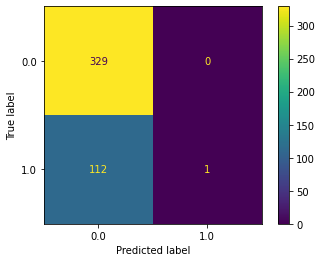

In [26]:
model6.fit(X_train,y_train)
plot_confusion_matrix(model6,X,y)

## KNeighbors on Cetuximab(good arm)

In [27]:
#Read Cetux data and define X and Y
cetux = pd.read_csv("../raw_data/cetux.csv")
X_cet=cetux.drop(columns=["skin_rash","age"])
y_cet=cetux["skin_rash"]

#Split the train and test data
X_train_cet, X_test_cet, y_train_cet, y_test_cet = train_test_split(X_cet, y_cet,
                                                    test_size = 0.25, 
                                                    random_state = 6) # Holdout



In [28]:
X_cet.head()

,pat_nr,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Absolute score (sig.score),sex
0,9,0.094907,0.000000,0.137163,0.101927,0.0,0.238005,0.00000,0.003426,0.095790,...,0.027825,0.100204,0.000000,0.0,0.266175,0.000000,0.105588,0,1.409259,1.0
1,10,0.000000,0.000000,0.140969,0.088889,0.0,0.335134,0.10024,0.047378,0.114226,...,0.088081,0.000000,0.012399,0.0,0.180146,0.000000,0.094210,0,1.342065,1.0
2,12,0.099194,0.000000,0.178495,0.168030,0.0,0.424224,0.00000,0.000000,0.104842,...,0.008087,0.037391,0.000000,0.0,0.130396,0.049491,0.077119,0,1.507568,1.0
3,15,0.012496,0.000000,0.227445,0.236798,0.0,0.345965,0.00000,0.000000,0.176033,...,0.018094,0.000000,0.000000,0.0,0.099608,0.000000,0.005528,0,1.222350,1.0
4,16,0.000000,0.021483,0.089045,0.127555,0.0,0.532945,0.00000,0.056914,0.091205,...,0.264603,0.125858,0.016184,0.0,0.071851,0.000000,0.151693,0,1.581685,1.0


In [29]:
from sklearn.model_selection import GridSearchCV
model5 = KNeighborsClassifier()
k_grid={"n_neighbors":[2,3,4,5,6,7,10],'p': [1, 2, 3,4,5]}
 
search = GridSearchCV(model5, k_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs=-1 # paralellize computation
                          ) 
search.fit(X_train_cet,y_train_cet);
search.best_params_

{'n_neighbors': 2, 'p': 2}

In [30]:
model7=KNeighborsClassifier(n_neighbors=2,p=2)
cv_results=cross_validate(model6,X_train_cet,y_train_cet,cv=10)
cv_results['test_score'].mean()

0.49154411764705885

/home/henry/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


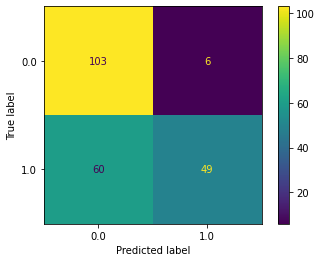

In [31]:
model7.fit(X_train_cet,y_train_cet)
plot_confusion_matrix(model7,X_cet,y_cet)

Text(0, 0.5, 'Model score')

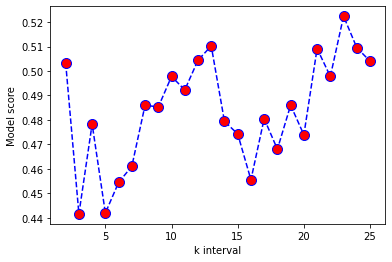

In [32]:
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
k_interval=list(range(2,26))
k_score=[]
for k in k_interval:
    baseline_model = KNeighborsClassifier(n_neighbors=k)
    cv_result=cross_validate(baseline_model,X_train_cet,y_train_cet,cv=10)
    k_score.append(cv_result['test_score'].mean())
plt.plot(k_interval,k_score,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.xlabel('k interval')
plt.ylabel('Model score')

## Random Forest
Grid search for 
Evaluate in 

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
#@interact(max_depth=5)
model8 = RandomForestClassifier(max_depth=20)

# 10-Fold Cross validation
print(np.mean(cross_val_score(model8, X_train_cet, y_train_cet, cv=10)))

#model8.fit(X_train_cet, y_train_cet)

0.49669117647058825


In [34]:
    param_grid = {
                     'n_estimators': [5, 10, 15, 20],
                     'max_depth': [2, 5, 7, 9],
                    'criterion': ['gini','entropy'],
                 }
    param_grid2 = {'bootstrap': [True, False],
     'max_depth': [10, 20, 30, 40, 50, None],
     'max_features': ['auto', 'sqrt'],
    'criterion': ['gini','entropy'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'n_estimators': [10,20,50]}

In [35]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(model8, param_grid2, cv=10)
search.fit(X_train_cet, y_train_cet)
search.best_params_

KeyboardInterrupt: 

In [ ]:
grid_model8=RandomForestClassifier(bootstrap= False,criterion= 'gini',max_depth=10,max_features='sqrt',min_samples_leaf= 1, min_samples_split= 5,n_estimators=10)
grid_model8.fit(X_train_cet, y_train_cet)
plot_confusion_matrix(grid_model8,X_train_cet, y_train_cet)

In [ ]:
cv_results=cross_validate(grid_model8,X_train_cet,y_train_cet,cv=5)
cv_results['test_score'].mean()

## XGbosst

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model9 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model9.fit(X_train_cet, y_train_cet)


In [ ]:
#Grid search params
param_grid = {
                 'n_estimators': [2,3,4,5, 10, 15, 200],
                 'max_depth': [2, 5, 7, 9,20],
                # 'booster': ['gbtree','gblinear','dart'],
             }
grid_model9 = GridSearchCV(model8, param_grid, cv=10)
grid_model9.fit(X_train_cet, y_train_cet)
grid_model9.best_params_


In [ ]:
model9 = XGBClassifier(use_label_encoder=False,max_depth=7,n_estimators=10, eval_metric='mlogloss',booster='dart')
grid_model9.fit(X_train_cet, y_train_cet)
y_pred = grid_model9.predict(X_test_cet)
accuracy = accuracy_score(y_test_cet, y_pred)
accuracy

In [ ]:
    cv_results=cross_validate(grid_model9,X_train_cet,y_train_cet,cv=5)
    cv_results['test_score'].mean()

## Supervised learning - reduced DF (remove patience with high p)

In [ ]:
clinical_df[['CET1_REST0','os_time_mo','ets_cat','orr1','predictedCMS',"pat_nr","skin_rash"]]

In [ ]:
clinical_df[['CET1_REST0','os_time_mo','ets_cat','orr1','predictedCMS',"pat_nr","skin_rash"]].info()

## Dimension reduction AutoEncoder

In [70]:
X_train

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
158,0.009906,0.064917,0.038704,0.030068,0.00000,0.397967,0.042199,0.014735,0.000000,0.0,...,0.019791,0.043288,0.063799,0.025919,0.030814,0.000000,0.000000,0.041598,0.0,0.082587
337,0.042715,0.000000,0.098282,0.031695,0.00000,0.233593,0.000000,0.002919,0.089281,0.0,...,0.028781,0.000000,0.014472,0.192694,0.034576,0.000000,0.000000,0.102147,0.0,0.056671
403,0.000000,0.000000,0.105634,0.162633,0.00000,0.199479,0.000000,0.030480,0.039348,0.0,...,0.000000,0.000000,0.126361,0.136461,0.006102,0.000000,0.000000,0.028326,0.0,0.124278
355,0.038165,0.000000,0.044255,0.143313,0.00000,0.251941,0.000000,0.024373,0.107857,0.0,...,0.028500,0.000000,0.065310,0.129905,0.000000,0.000000,0.000000,0.120715,0.0,0.045668
299,0.084306,0.000000,0.209546,0.051245,0.00000,0.176489,0.070384,0.008502,0.038184,0.0,...,0.000864,0.000000,0.017587,0.082029,0.000000,0.000000,0.180107,0.000000,0.0,0.031535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,0.000931,0.008527,0.110581,0.129436,0.00983,0.159117,0.000000,0.000000,0.000000,0.0,...,0.021593,0.058145,0.000000,0.161896,0.000000,0.024907,0.059278,0.026533,0.0,0.208760
106,0.006780,0.107560,0.180847,0.050538,0.00000,0.263467,0.000000,0.064102,0.019881,0.0,...,0.000000,0.000000,0.015590,0.063265,0.059150,0.003647,0.000182,0.047680,0.0,0.079652
227,0.000000,0.009965,0.169244,0.119721,0.00000,0.227993,0.000000,0.039841,0.087427,0.0,...,0.014435,0.000000,0.030877,0.073857,0.044830,0.000000,0.000000,0.115029,0.0,0.020634
201,0.123653,0.000000,0.043847,0.100226,0.00000,0.284613,0.000000,0.000000,0.102987,0.0,...,0.000000,0.000000,0.071820,0.115367,0.000000,0.000000,0.101219,0.000000,0.0,0.003584


In [71]:
import tensorflow.keras
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Conv1D, Conv1DTranspose
from tensorflow.keras.constraints import max_norm
import matplotlib.pyplot as plt
import numpy as np
import math

In [72]:
# Create the model
model = Sequential()
model.add(Conv1D(128, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
model.add(Conv1D(32, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv1DTranspose(32, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv1DTranspose(128, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv1D(1, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='sigmoid', padding='same'))

model.summary()

# Compile and fit data
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_train, X_train,
                epochs=no_epochs,
                batch_size=batch_size,
                validation_split=validation_split)


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 20, 128)           512       
                                                                 
 conv1d_16 (Conv1D)          (None, 18, 32)            12320     
                                                                 
 conv1d_transpose_10 (Conv1D  (None, 20, 32)           3104      
 Transpose)                                                      
                                                                 
 conv1d_transpose_11 (Conv1D  (None, 22, 128)          12416     
 Transpose)                                                      
                                                                 
 conv1d_17 (Conv1D)          (None, 22, 1)             385       
                                                                 
Total params: 28,737
Trainable params: 28,737
Non-tra

In [73]:
num_reconstructions = 331
samples = X_train[:num_reconstructions]
reconstructions = model.predict(samples)

In [74]:
reconstructions.shape

(331, 22, 1)